In [1]:
import pickle
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.svm import LinearSVC

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel

In [3]:
mode = 'SVM'

Generate the dataset

In [4]:
f2= open("input_spike_294.pickle",'rb')
input_spike = pickle.load(f2)
f2.close()

f3= open("target_label_294.pickle",'rb')
out_direction = pickle.load(f3)
f3.close()

In [5]:
print(input_spike.shape)
print(out_direction.shape)

(294, 71, 80)
(294,)


In [6]:
input_spike = np.sum(input_spike,axis = 2)
print(input_spike.shape)

(294, 71)


In [7]:
input_spike[:,40] = 0

## Select k best

ours, 15 neurons, mean accuray 85.68%

In [20]:
selected_unit2 = [10, 11, 12, 14, 21, 22, 26,30, 32, 35, 38, 44, 63, 64, 67]

f_classif, 15 neurons,accuracy 81.92%. 

In [8]:
selector = SelectKBest(f_classif, k=15)

In [9]:
X_new = selector.fit(input_spike, out_direction)

C:\Users\user\anaconda3\envs\success\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [40] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\anaconda3\envs\success\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [10]:
judgement = selector.get_support(False)
print(judgement)

[False False False False False False False False  True  True  True False
  True  True  True False False False False False False  True  True False
 False False False False False False  True False False False False False
 False False  True False False False  True False  True False False False
  True False False False False False False False False False False False
 False False False False  True False False False  True False False]


In [12]:
selected_neuron = np.where(judgement==True)[0]
print(selected_neuron)

[ 8  9 10 12 13 14 21 22 30 38 42 44 48 64 68]


In [13]:
X_new = selector.fit_transform(input_spike, out_direction)

C:\Users\user\anaconda3\envs\success\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [40] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\anaconda3\envs\success\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [14]:
print(X_new.shape)

(294, 15)


In [15]:
input_spike = X_new

mutual_info_classif, 15 neurons, mean accuracy 83.29%

In [165]:
selector2 = SelectKBest(mutual_info_classif, k=15)

In [166]:
X_new2 = selector2.fit(input_spike, out_direction)

In [125]:
judgement2 = selector2.get_support(False)
print(judgement2)

[False False False False False  True False False  True  True  True False
  True  True  True False False False False False False False  True False
 False False False False False False  True False False False False False
 False False  True False False False  True False  True False False False
  True False False False False False False False False False False False
 False False False False  True False False False  True False False]


In [126]:
selected_neuron2 = np.where(judgement2==True)[0]
print(selected_neuron2)

[ 5  8  9 10 12 13 14 22 30 38 42 44 48 64 68]


In [167]:
X_new2 = selector2.fit_transform(input_spike, out_direction)

In [168]:
input_spike = X_new2

chi2, 15 neurons, mean accuracy

In [22]:
selector3 = SelectKBest(chi2, k=15)

In [27]:
X_new3 = selector3.fit(input_spike, out_direction)

In [28]:
judgement3 = selector3.get_support(False)
print(judgement3)

[False False False False False False False False  True False  True False
  True  True  True False False False False False False  True  True False
 False False False False False False  True False False False False False
 False False  True False False False  True False  True False False False
  True False  True False False False False False False False False False
 False False False False  True False False False  True False False]


In [29]:
selected_neuron3 = np.where(judgement3==True)[0]
print(selected_neuron3)

[ 8 10 12 13 14 21 22 30 38 42 44 48 50 64 68]


In [30]:
X_new3 = selector3.fit_transform(input_spike, out_direction)

In [31]:
input_spike = X_new3

### Recursive feature selection

recursively delete features to find 39 features 

In [52]:
estimator = svm.SVC(kernel='linear')

In [53]:
selector4 = RFECV(estimator, step=1, cv=5)

In [54]:
selector4 = selector4.fit(input_spike, out_direction)

In [56]:
selector4.support_

array([ True, False,  True,  True, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False, False,  True,
        True, False, False,  True, False,  True,  True, False,  True,
       False, False,  True,  True, False, False,  True,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True, False,  True])

In [58]:
selector4.ranking_

array([ 1,  3,  1,  1, 10,  6,  1,  2,  1,  1,  1,  1,  1,  1,  1, 29,  1,
        1,  1, 21,  1,  1,  1,  9, 19, 23,  1,  1, 13, 14,  1, 20,  1,  1,
       17,  1, 27, 31,  1,  1, 33, 12,  1,  1,  1, 22, 24,  1, 11,  1, 15,
       25, 32, 18,  4,  7, 26, 16,  1,  1,  1,  1,  8,  1,  1, 28, 30,  1,
        1,  5,  1])

In [59]:
judgement4 = selector4.support_

In [60]:
selected_neuron4 = np.where(judgement4==True)[0]
print(selected_neuron4)

[ 0  2  3  6  8  9 10 11 12 13 14 16 17 18 20 21 22 26 27 30 32 33 35 38
 39 42 43 44 47 49 58 59 60 61 63 64 67 68 70]


In [61]:
X_new4 = input_spike[:,selected_neuron4]
print(X_new4.shape)

(294, 39)


In [62]:
input_spike = X_new4

### Select from Model

linear svc

In [87]:
estimator5 = svm.SVC(kernel='linear')

In [88]:
selector5 = SelectFromModel(estimator=estimator5)

In [89]:
selector5.fit(input_spike,out_direction)

SelectFromModel(estimator=SVC(kernel='linear'))

In [91]:
judgement5 = selector5.get_support()

In [92]:
selected_neuron5 = np.where(judgement5==True)[0]
print(selected_neuron5)

[ 3  6  7  8  9 10 11 13 18 20 21 22 26 30 32 33 35 38 39 42 43 44 48 49
 54 58 59 64 68 70]


In [93]:
X_new5 = input_spike[:,selected_neuron5]
print(X_new5.shape)

(294, 30)


linear svc with l1 penalty

In [110]:
estimator6 = LinearSVC(C=0.01, penalty="l1", dual=False)

In [111]:
selector6 = SelectFromModel(estimator=estimator6)

In [112]:
selector6.fit(input_spike,out_direction)

SelectFromModel(estimator=LinearSVC(C=0.01, dual=False, penalty='l1'))

In [113]:
judgement6 = selector6.get_support()

In [114]:
selected_neuron6 = np.where(judgement6==True)[0]
print(selected_neuron6)

[ 8  9 10 11 12 13 14 20 21 22 26 29 30 32 33 34 35 38 39 42 44 63 64 67
 68]


In [115]:
X_new6 = input_spike[:,selected_neuron6]
print(X_new6.shape)

(294, 25)


In [116]:
input_spike = X_new6

### Select 15 neurons using SFM

In [135]:
estimator7 = svm.SVC(kernel='linear')

In [137]:
selector7 = SelectFromModel(estimator=estimator7,max_features=15)

In [142]:
selector7.fit(input_spike,out_direction)

SelectFromModel(estimator=SVC(kernel='linear'), max_features=15)

In [143]:
judgement7 = selector7.get_support()

In [144]:
selected_neuron7 = np.where(judgement7==True)[0]
print(selected_neuron7)

[ 8  9 10 11 21 22 26 30 32 33 38 42 44 64 68]


In [145]:
X_new7 = input_spike[:,selected_neuron7]
print(X_new7.shape)

(294, 15)


### 10-fold cross validation

In [146]:
k = 10
skf = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)

In [147]:
valid_svm = []
correct_direction = np.zeros(6)
confusion_matrix = np.zeros((6,6))
iteration = 0

for train_index , valid_index in skf.split(input_spike,out_direction):
    
    # Get the training set and the validation set
    X_train  = input_spike[train_index,:]
    X_valid = input_spike[valid_index,:]
    Y_train = out_direction[train_index]
    Y_valid = out_direction[valid_index]
    
    # Get the SVM model
    clf = svm.NuSVC(nu = 0.8)
    
    # Train the SVM model
    clf.fit(X_train,Y_train)
    
    # Test the accuracy on the validation set
    prediction = clf.predict(X_valid)
    accuracy = np.sum(prediction == Y_valid) / len(Y_valid)
    print(f'The accuracy for split {iteration+1} is {accuracy * 100 :> 0.2f}%')
    valid_svm.append(accuracy)
    
    # Get the confusion matrix
    # Compute the accuracy for each direction
    correct_direction_split = np.zeros(6)
    size = np.zeros(6)
    
    for i in range(6):
        
        outi = np.where(Y_valid == i)[0]
        size[i] = len(outi)
        predi = prediction[outi]
        
        for j in range(6):
            confusion_matrix[i][j] += len(np.where(predi == j)[0])
            
        correct_direction_split[i] = len(np.where(predi == i)[0]) / size[i]
        correct_direction[i] +=  correct_direction_split[i]
        
    
    iteration +=  1
        
correct_direction /= k

The accuracy for split 1 is  83.33%
The accuracy for split 2 is  90.00%
The accuracy for split 3 is  90.00%
The accuracy for split 4 is  93.33%
The accuracy for split 5 is  82.76%
The accuracy for split 6 is  89.66%
The accuracy for split 7 is  75.86%
The accuracy for split 8 is  86.21%
The accuracy for split 9 is  86.21%
The accuracy for split 10 is  82.76%


In [148]:
print(valid_svm)
valid_acc_mean = np.mean(valid_svm)
print(f"Cross Validation Accuracy: {(100*valid_acc_mean):>0.2f} %")

[0.8333333333333334, 0.9, 0.9, 0.9333333333333333, 0.8275862068965517, 0.896551724137931, 0.7586206896551724, 0.8620689655172413, 0.8620689655172413, 0.8275862068965517]
Cross Validation Accuracy: 86.01 %


In [28]:
total_accuracy = 0
correct_direction = np.zeros(6)
confusion_matrix = np.zeros((6,6))
decreased_accuracy = np.zeros((71,6,k))
iteration = 0

for train_index , valid_index in skf.split(input_spike,out_direction):
    
    # Get the training set and the validation set
    X_train  = input_spike[train_index,:]
    X_valid = input_spike[valid_index,:]
    Y_train = out_direction[train_index]
    Y_valid = out_direction[valid_index]
    
    # Get the SVM model
    clf = svm.NuSVC(nu = 0.8)
    
    # Train the SVM model
    clf.fit(X_train,Y_train)
    
    # Test the accuracy on the validation set
    prediction = clf.predict(X_valid)
    accuracy = np.sum(prediction == Y_valid) / len(Y_valid)
    print(f'The accuracy for split {iteration+1} is {accuracy * 100 :> 0.2f}%')
    total_accuracy += accuracy
    
    # Get the confusion matrix
    # Compute the accuracy for each direction
    correct_direction_split = np.zeros(6)
    size = np.zeros(6)
    
    for i in range(6):
        
        outi = np.where(Y_valid == i)[0]
        size[i] = len(outi)
        predi = prediction[outi]
        
        for j in range(6):
            confusion_matrix[i][j] += len(np.where(predi == j)[0])
            
        correct_direction_split[i] = len(np.where(predi == i)[0]) / size[i]
        correct_direction[i] +=  correct_direction_split[i]
        
    # Set certain unit to 0
    # Test the model again
    # Get the decreased accuracy
    for u in range(71):
        
        X_u = copy.deepcopy(X_valid)
        
        X_u[:,u] = 0
        predu = clf.predict(X_u)
        
        for d in range(6):
            
            outd = np.where(Y_valid == d)[0]
            predud = predu[outd]
            correct_direction_unit = len(np.where(predud ==d)[0]) / size[d]
            decreased_accuracy[u][d][iteration] = (correct_direction_split[d] - correct_direction_unit)*100
    
    iteration +=  1
        
correct_direction /= k
print(f'The validation accuracy is {total_accuracy * 10 :> 0.2f}%')

The accuracy for split 1 is  80.00%


IndexError: index 15 is out of bounds for axis 1 with size 15

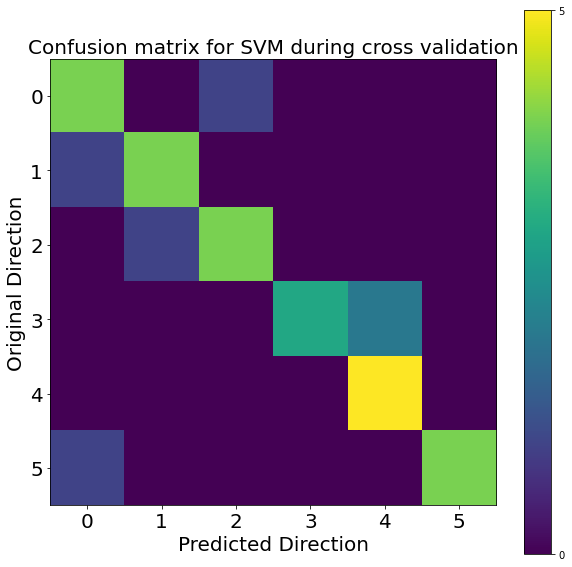

In [29]:
fig, ax = plt.subplots(figsize = (10,10))
cmap = ax.imshow(confusion_matrix)
ax.set_title(f'Confusion matrix for {mode} during cross validation',fontsize = 20)
ax.set_xlabel('Predicted Direction',fontsize = 20)
ax.set_ylabel('Original Direction',fontsize = 20)
ax.tick_params(axis='y',labelsize = 20)
ax.tick_params(axis='x',labelsize = 20)

cbar = fig.colorbar(
    cmap, orientation='vertical',
    ticks=np.linspace(0, 50, 11),
)

### Comparison between methods

In [8]:
labels = 'ours','f_classif', 'mutual_info','chi2','SFM'

In [9]:
ours = [0.7666666666666667, 0.9, 0.9333333333333333, 0.9333333333333333, 0.8620689655172413, 0.9655172413793104, 0.6551724137931034, 0.7931034482758621, 0.8620689655172413, 0.896551724137931]

In [10]:
f_classif = [0.8, 0.8666666666666667, 0.8666666666666667, 0.9, 0.7241379310344828, 0.8620689655172413, 0.7241379310344828, 0.7586206896551724, 0.7241379310344828, 0.9655172413793104]

In [11]:
mutual_info = [0.8666666666666667, 0.9, 0.8666666666666667, 0.8666666666666667, 0.7931034482758621, 0.896551724137931, 0.7586206896551724, 0.7931034482758621, 0.7931034482758621, 0.896551724137931]

In [12]:
chi2 = [0.8, 0.8333333333333334, 0.9, 0.9, 0.7586206896551724, 0.8620689655172413, 0.7241379310344828, 0.7586206896551724, 0.7241379310344828, 0.9310344827586207]

In [13]:
SFM15 = [0.8333333333333334, 0.9, 0.9, 0.9333333333333333, 0.8275862068965517, 0.896551724137931, 0.7586206896551724, 0.8620689655172413, 0.8620689655172413, 0.8275862068965517]

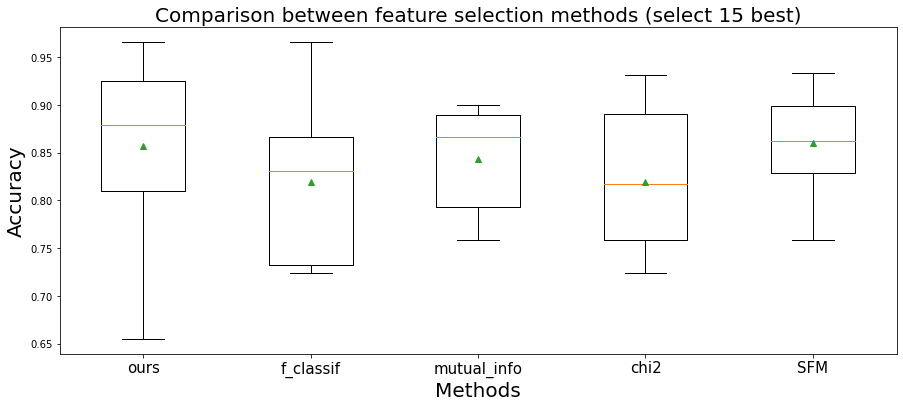

In [16]:
fig, ax = plt.subplots(figsize = (15,6))

ax.boxplot([ours,f_classif,mutual_info,chi2,SFM15],labels = labels,showmeans = True)

ax.set_title(f'Comparison between feature selection methods (select 15 best)',fontsize = 20)
ax.set_xlabel('Methods',fontsize = 20)
ax.set_ylabel('Accuracy',fontsize=20)
ax.tick_params(axis='y',labelsize = 10)
ax.tick_params(axis='x',labelsize = 15)

In [128]:
labels = '71 neurons', '39 neurons (RFECV)','30 neurons (SFM)','25 neurons (SFM_l1)','15 neurons (ours)'

In [129]:
RFECV = [0.8666666666666667, 0.9, 0.9333333333333333, 0.9666666666666667, 0.896551724137931, 0.896551724137931, 0.7241379310344828, 0.8275862068965517, 0.7586206896551724, 0.896551724137931]

In [130]:
SFM = [0.8333333333333334, 0.9, 0.9, 0.9333333333333333, 0.8275862068965517, 0.896551724137931, 0.7586206896551724, 0.8620689655172413, 0.8620689655172413, 0.8275862068965517]

In [131]:
SFM_l1 = [0.8333333333333334, 0.9, 0.9, 0.9, 0.8275862068965517, 0.896551724137931, 0.7241379310344828, 0.7931034482758621, 0.8620689655172413, 0.8620689655172413]

In [132]:
svm_origin = [0.8333333333333334, 0.9, 0.9, 0.9333333333333333, 0.8275862068965517, 0.896551724137931, 0.7586206896551724, 0.8620689655172413, 0.8620689655172413, 0.8275862068965517]

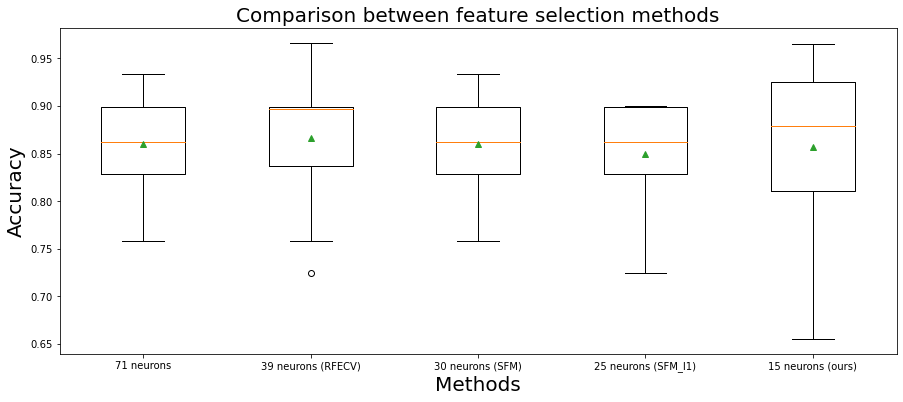

In [134]:
fig, ax = plt.subplots(figsize = (15,6))

ax.boxplot([svm_origin,RFECV,SFM,SFM_l1,ours],labels = labels,showmeans = True)

ax.set_title(f'Comparison between feature selection methods',fontsize = 20)
ax.set_xlabel('Methods',fontsize = 20)
ax.set_ylabel('Accuracy',fontsize=20)
ax.tick_params(axis='y',labelsize = 10)
ax.tick_params(axis='x',labelsize = 10)

In [16]:
decreased_accuracy = np.array(decreased_accuracy)
print(decreased_accuracy.shape)

(71, 6, 10)


In [17]:
decreased_accuracy_mean = np.mean(decreased_accuracy,axis=2)
decreased_accuracy_std = np.std(decreased_accuracy,axis=2)
decreased_accuracy_max = np.max(decreased_accuracy,axis=2)
decreased_accuracy_min = np.min(decreased_accuracy,axis=2)

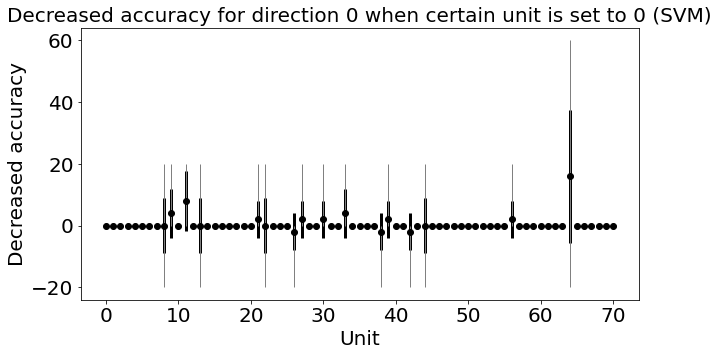

In [18]:
unit_range = np.arange(71)
fig, ax = plt.subplots(figsize = (10,5))
ax.errorbar(unit_range,decreased_accuracy_mean[:,0],decreased_accuracy_std[:,0],linestyle = 'None',fmt='ok',lw = 3)
ax.errorbar(unit_range,decreased_accuracy_mean[:,0],[decreased_accuracy_mean[:,0] - decreased_accuracy_min[:,0],  
                                                    decreased_accuracy_max[:,0] - decreased_accuracy_mean[:,0]],
            linestyle = 'None',fmt='.k',ecolor = 'gray',lw=1)
ax.set_title(f'Decreased accuracy for direction 0 when certain unit is set to 0 ({mode})',fontsize = 20)
ax.set_xlabel('Unit',fontsize = 20)
ax.set_ylabel('Decreased accuracy',fontsize=20)
ax.tick_params(axis='y',labelsize = 20)
ax.tick_params(axis='x',labelsize = 20)

Unit 12, 21, 22, 33, 64 are important for direction 0. 

Unit 11,64,33,21,30 are important for direction 0. 

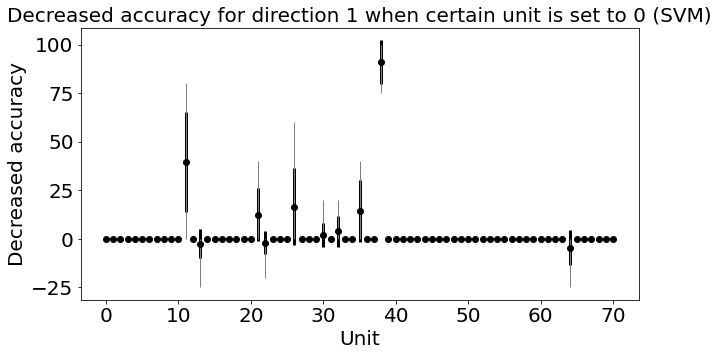

In [19]:
unit_range = np.arange(71)
fig, ax = plt.subplots(figsize = (10,5))
ax.errorbar(unit_range,decreased_accuracy_mean[:,1],decreased_accuracy_std[:,1],linestyle = 'None',fmt='ok',lw = 3)
ax.errorbar(unit_range,decreased_accuracy_mean[:,1],[decreased_accuracy_mean[:,1] - decreased_accuracy_min[:,1],  
                                                    decreased_accuracy_max[:,1] - decreased_accuracy_mean[:,1]],
            linestyle = 'None',fmt='.k',ecolor = 'gray',lw=1)
ax.set_title(f'Decreased accuracy for direction 1 when certain unit is set to 0 ({mode})',fontsize = 20)
ax.set_xlabel('Unit',fontsize = 20)
ax.set_ylabel('Decreased accuracy',fontsize=20)
ax.tick_params(axis='y',labelsize = 20)
ax.tick_params(axis='x',labelsize = 20)

Unit 11, 35, 38 are important for this direction

Unit 11, 21, 26, 35, 38 are important for direction 1. 

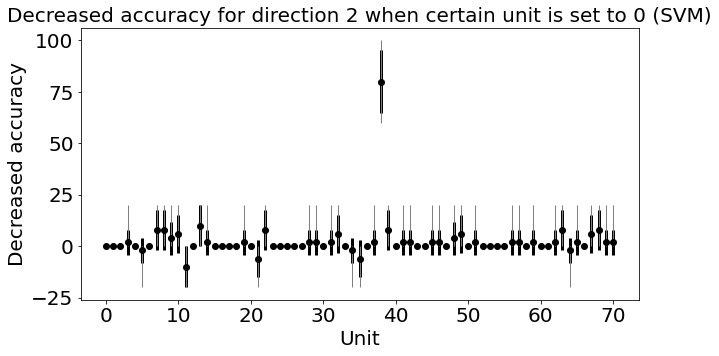

In [218]:
unit_range = np.arange(71)
fig, ax = plt.subplots(figsize = (10,5))
ax.errorbar(unit_range,decreased_accuracy_mean[:,2],decreased_accuracy_std[:,2],linestyle = 'None',fmt='ok',lw = 3)
ax.errorbar(unit_range,decreased_accuracy_mean[:,2],[decreased_accuracy_mean[:,2] - decreased_accuracy_min[:,2],  
                                                    decreased_accuracy_max[:,2] - decreased_accuracy_mean[:,2]],
            linestyle = 'None',fmt='.k',ecolor = 'gray',lw=1)
ax.set_title(f'Decreased accuracy for direction 2 when certain unit is set to 0 ({mode})',fontsize = 20)
ax.set_xlabel('Unit',fontsize = 20)
ax.set_ylabel('Decreased accuracy',fontsize=20)
ax.tick_params(axis='y',labelsize = 20)
ax.tick_params(axis='x',labelsize = 20)

Unit 22,25,68 are important for this direction. 

Unit 12,38,39,63,68 are important for direction 2. 

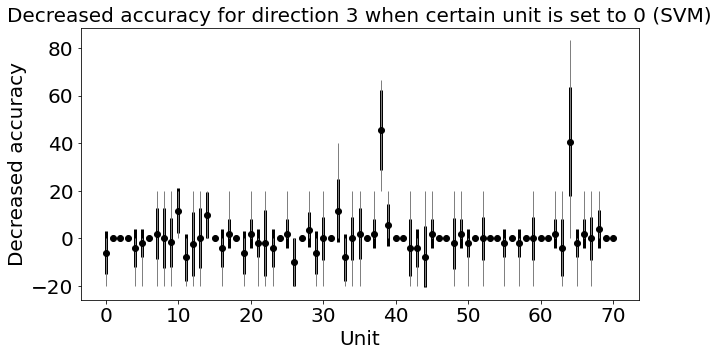

In [219]:
unit_range = np.arange(71)
fig, ax = plt.subplots(figsize = (10,5))
ax.errorbar(unit_range,decreased_accuracy_mean[:,3],decreased_accuracy_std[:,3],linestyle = 'None',fmt='ok',lw = 3)
ax.errorbar(unit_range,decreased_accuracy_mean[:,3],[decreased_accuracy_mean[:,3] - decreased_accuracy_min[:,3],  
                                                    decreased_accuracy_max[:,3] - decreased_accuracy_mean[:,3]],
            linestyle = 'None',fmt='.k',ecolor = 'gray',lw=1)
ax.set_title(f'Decreased accuracy for direction 3 when certain unit is set to 0 ({mode})',fontsize = 20)
ax.set_xlabel('Unit',fontsize = 20)
ax.set_ylabel('Decreased accuracy',fontsize=20)
ax.tick_params(axis='y',labelsize = 20)
ax.tick_params(axis='x',labelsize = 20)

Unit 38, 40, 68, 12,14 are important for this direction. 

Unit 10, 14, 32, 38, 64, are important for this direction. 

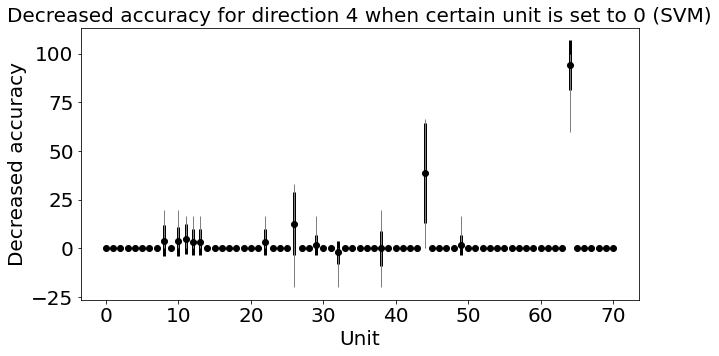

In [220]:
unit_range = np.arange(71)
fig, ax = plt.subplots(figsize = (10,5))
ax.errorbar(unit_range,decreased_accuracy_mean[:,4],decreased_accuracy_std[:,4],linestyle = 'None',fmt='ok',lw = 3)
ax.errorbar(unit_range,decreased_accuracy_mean[:,4],[decreased_accuracy_mean[:,4] - decreased_accuracy_min[:,4],  
                                                    decreased_accuracy_max[:,4] - decreased_accuracy_mean[:,4]],
            linestyle = 'None',fmt='.k',ecolor = 'gray',lw=1)
ax.set_title(f'Decreased accuracy for direction 4 when certain unit is set to 0 ({mode})',fontsize = 20)
ax.set_xlabel('Unit',fontsize = 20)
ax.set_ylabel('Decreased accuracy',fontsize=20)
ax.tick_params(axis='y',labelsize = 20)
ax.tick_params(axis='x',labelsize = 20)

Unit 10, 11, 12, 14, 16, 19, 22, 24, 26, 29, 31, 39, 42, 44, 48, 50, 59, 63,64 are important for this direction. 

Unit 26, 44, 64 are important for direction 4. 

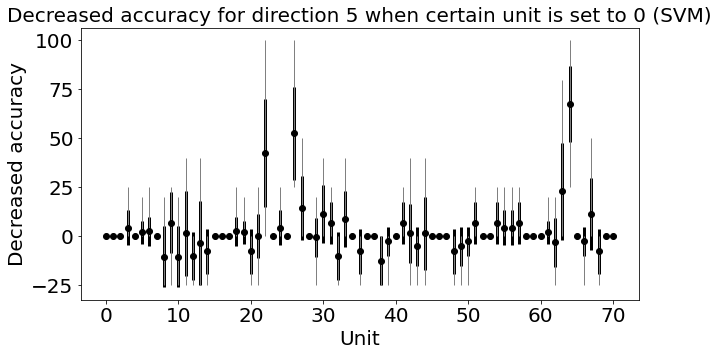

In [221]:
unit_range = np.arange(71)
fig, ax = plt.subplots(figsize = (10,5))
ax.errorbar(unit_range,decreased_accuracy_mean[:,5],decreased_accuracy_std[:,5],linestyle = 'None',fmt='ok',lw = 3)
ax.errorbar(unit_range,decreased_accuracy_mean[:,5],[decreased_accuracy_mean[:,5] - decreased_accuracy_min[:,5],  
                                                    decreased_accuracy_max[:,5] - decreased_accuracy_mean[:,5]],
            linestyle = 'None',fmt='.k',ecolor = 'gray',lw=1)
ax.set_title(f'Decreased accuracy for direction 5 when certain unit is set to 0 ({mode})',fontsize = 20)
ax.set_xlabel('Unit',fontsize = 20)
ax.set_ylabel('Decreased accuracy',fontsize=20)
ax.tick_params(axis='y',labelsize = 20)
ax.tick_params(axis='x',labelsize = 20)

Unit 22, 26, 63, 64 are important for this direction. 

Unit 22, 26, 63, 64, 67 are important for direction 5. 